In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from clean_functions import load_neural_data, make_a_plot_beautiful, transpose_neural_data, select_contents, generate_times

In [3]:
neural_data_path = "data/mag_wm_data.mat"
contents = [f"r{i}" for i in range(1, 7)]

neural_data = load_neural_data(file_path=neural_data_path, contents=contents)

# preprocess neural data
neural_data = transpose_neural_data(neural_data) # reps, imgs, ns, tb

In [6]:
def get_per_image_neural_response(neural_data, init: int, end: int):
    return np.nanmean(neural_data[:, :, :, init:end + 1], axis=(0, 3)) # average over reps and 180-540ms

task = "active"

per_image_neural_response = {}
for delay in tqdm([400, 800, 1200]):
    content = select_contents(delay=delay, task=task)
    per_image_neural_response[delay] = get_per_image_neural_response(neural_data[content], 6, 18)

  0%|          | 0/3 [00:00<?, ?it/s]

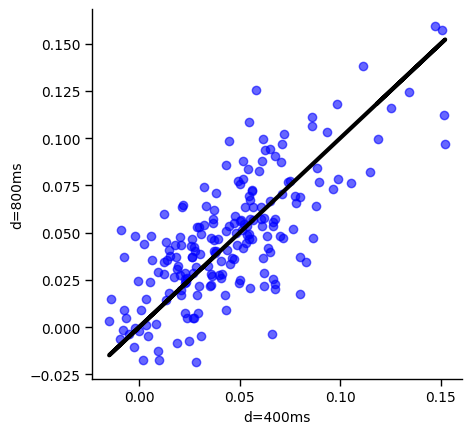

In [7]:
ns = 3 # select the first neural site

fig, ax = plt.subplots()

ax.scatter(per_image_neural_response[400][:, ns], per_image_neural_response[800][:, ns], label="image neural response", alpha=0.6, color="blue") # x-axis = 400ms vs y-axis = 800ms
ax.plot(per_image_neural_response[400][:, ns], per_image_neural_response[400][:, ns], label="x=y line", color="black", alpha=1, linewidth=3)

make_a_plot_beautiful(ax)

plt.xlabel("d=400ms")
plt.ylabel("d=800ms")
# plt.title("Single Neuron Response delay 400ms")

plt.show()

In [43]:
num_sites = 3  # Number of neural sites per figure
num_total_sites = 192  # Total number of neural sites

delay_pairs = [(400, 800), (400, 1200), (800, 1200)]  # Time delay comparisons
titles = ["400ms vs 800ms", "400ms vs 1200ms", "800ms vs 1200ms"]

for start_ns in range(0, num_total_sites, num_sites):  # Iterate over groups of three neurons
    fig, axes = plt.subplots(num_sites, 3, figsize=(20, 20), sharex=False, sharey=False)
    
    for i, ns in enumerate(range(start_ns, min(start_ns + num_sites, num_total_sites))):  # Iterate over neural sites in batch
        for col, (d1, d2) in enumerate(delay_pairs):  # Iterate over delay pairs
            ax = axes[i, col]  # Select the correct subplot
            
            # Scatter plot
            ax.scatter(per_image_neural_response[d1][:, ns], per_image_neural_response[d2][:, ns], 
                       label="Image Neural Response", alpha=0.6, color="blue", s=5)  # Reduced size for clarity
            
            # x = y line
            ax.plot(per_image_neural_response[d1][:, ns], per_image_neural_response[d1][:, ns], 
                    label="x = y line", color="black", alpha=1, linewidth=1)
            
            # Beautify the plot
            make_a_plot_beautiful(ax)
            
            # Set labels only for the first row and first column
            if i == 0:
                ax.set_title(titles[col], fontsize=12)
            if col == 0:
                ax.set_ylabel(f"Neuron {ns+1}", fontsize=10)
    
    # Adjust layout
    plt.tight_layout()
    
    # Save the plot with appropriate filename
    plt.savefig(f"neural_scatter_{start_ns+1}_to_{start_ns+num_sites}.png", dpi=300)
    plt.close(fig)

# Calculate delta between delays

In [8]:
delay_pairs = [(400, 800), (400, 1200), (800, 1200)]  # Time delay comparisons

deltas = {f"{d1}-{d2}": per_image_neural_response[d1] - per_image_neural_response[d2] for d1, d2 in delay_pairs}

In [9]:
deltas["400-800"].shape

(200, 192)

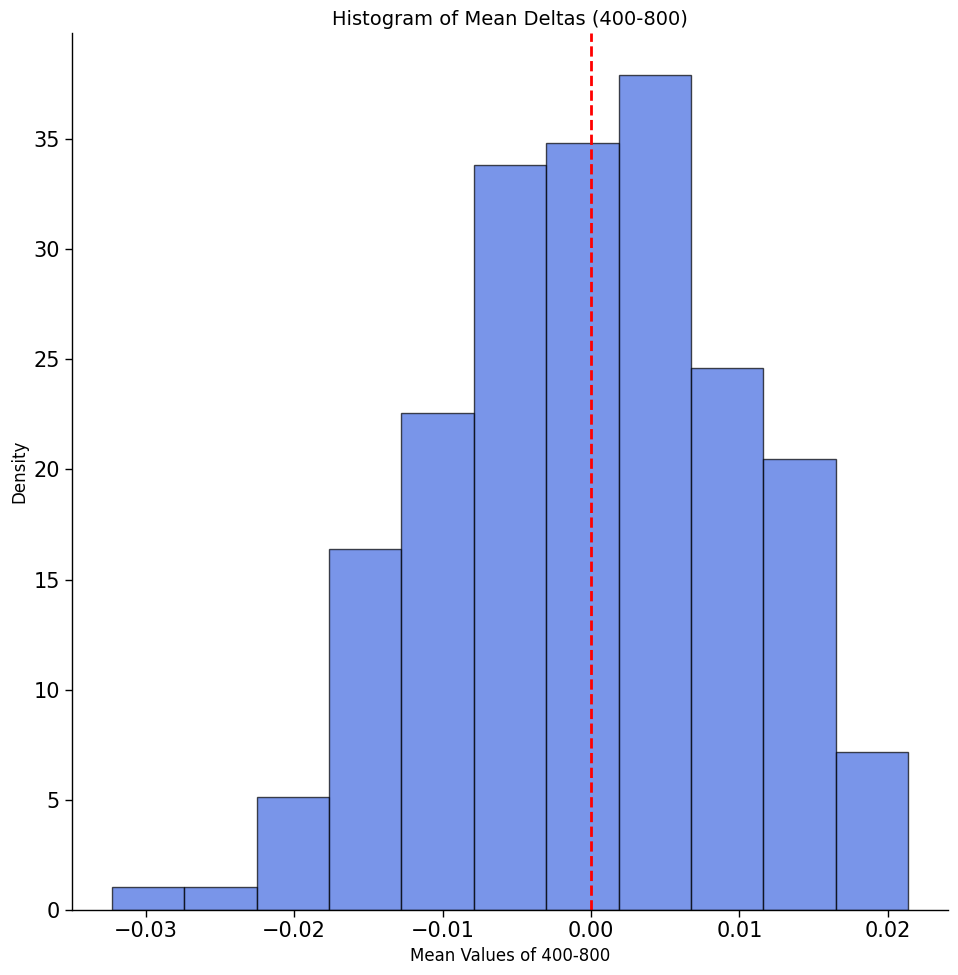

In [13]:
# Compute means while ignoring NaNs
delays = "400-800"

mean_values = np.nanmean(deltas[delays], axis=1) # Across Neurons

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the histogram
ax.hist(mean_values, bins=11, edgecolor='black', alpha=0.7, color="royalblue", density=True)

# Add a vertical line at x=0
ax.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Line')

make_a_plot_beautiful(ax)

# Add labels and title
ax.set_xlabel(f'Mean Values of {delays}', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title(f'Histogram of Mean Deltas ({delays})', fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
# Define delay pairs for analysis
delay_pairs = [(400, 800), (400, 1200), (800, 1200)]
titles = ["400ms vs 800ms", "400ms vs 1200ms", "800ms vs 1200ms"]
num_total_sites = 192

# Iterate over each neuron to generate and save histograms
for ns in range(num_total_sites):  # Iterate over individual neurons
    fig, axes = plt.subplots(1, len(delay_pairs), figsize=(25, 5), sharex=False, sharey=False)
    
    for col, (d1, d2) in enumerate(delay_pairs):  # Iterate over delay pairs
        ax = axes[col]
        
        # Compute means while ignoring NaNs
        diff_values = per_image_neural_response[d1][:, ns] - per_image_neural_response[d2][:, ns]

        # print(f"{diff_values = }")

        # Plot the histogram
        ax.hist(diff_values, bins=11, edgecolor='black', alpha=0.7, color="royalblue", density=True)

        # Add a vertical line at x=0
        ax.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Line')

        # Beautify the plot
        make_a_plot_beautiful(ax)

        # Set labels and title
        ax.set_xlabel(f'Mean Values of {d1}-{d2}', fontsize=12)
        ax.set_ylabel('Density', fontsize=12)
        ax.set_title(f'Neuron {ns+1}: {titles[col]}', fontsize=14)
    
    # Adjust layout
    plt.tight_layout()
    
    # Save the histogram plot for the neuron
    plt.savefig(f"./results/histogram/neuron_histogram_{ns+1}.png", dpi=300)
    plt.close(fig)

# Here I'm calculating the difference over different conditions (using different bin sizes)

In [11]:
neural_data["r4"].shape

(16, 200, 192, 41)

In [ ]:
# Here, I will describe what I'm doing and what I'm expecting to see.
# I have 41 time bins; each time bin represents 30ms. 
# Now I have time point at 0, 30ms, 60ms, 90ms, 120ms, ...
# Each time I'm going to select one of these time points and use specific time bins (1, 2, 3, 4, 5, 6, 7, 8, ..., 13) and calculate
# 
def get_per_image_neural_response(neural_data, init: int, end: int):
    return np.nanmean(neural_data[:, :, :, init:end + 1], axis=(0, 3)) # averaging over timebins # TODO: performing reliability after today

task = "active"
bin_duration = 30 # 30ms

total_time_bins = 41
initials = np.arange(0, total_time_bins, step=1)

max_bin_size = 15
bin_sizes = np.arange(1, max_bin_size + 1, step=1)

neural_data_output = {}
for init in tqdm(initials, desc="initials"):
    print(f"time point: {init*bin_duration}ms")

    neural_data_output[init] = {}
    for bin_size in tqdm(bin_sizes, desc="bin sizes"):
        if init + bin_size > total_time_bins: # ignore last iterations
            continue 
        print(f"\tBinsize = {bin_size}: {init*bin_duration}-{((init + bin_size)*bin_duration)}")
        neural_data_output[init][bin_size] = {}
        for delay in tqdm([400, 800, 1200], desc="delays"):
            content = select_contents(delay=delay, task=task)
            print(f"{content = }")
            neural_data_output[init][bin_size][delay] = get_per_image_neural_response(neural_data[content], init, init + bin_size)

In [16]:
print(neural_data_output.keys())
print(neural_data_output[0].keys())
print(neural_data_output[0][1].keys())
print(neural_data_output[0][1][400].shape)

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40])
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
dict_keys([])


KeyError: 400

In [19]:
neural_response_differences = {}

for init in tqdm(initials, desc="initials"):
    print(f"time point: {init*bin_duration}ms")

    neural_response_differences[init] = {}
    for bin_size in tqdm(bin_sizes, desc="bin sizes"):
        if init + bin_size > total_time_bins: # ignore last iterations
            continue 
        # print(f"\tBinsize = {bin_size}: {init*bin_duration}-{((init + bin_size)*bin_duration)}")
        neural_response_differences[init][bin_size] = {}
        neural_response_differences[init][bin_size]["400-800"] = neural_data_output[init][bin_size][400] - neural_data_output[init][bin_size][800]
        neural_response_differences[init][bin_size]["400-1200"] = neural_data_output[init][bin_size][400] - neural_data_output[init][bin_size][1200]
        neural_response_differences[init][bin_size]["800-1200"] = neural_data_output[init][bin_size][800] - neural_data_output[init][bin_size][1200]

initials:   0%|          | 0/41 [00:00<?, ?it/s]

time point: 0ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 30ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 60ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 90ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 120ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 150ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 180ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 210ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 240ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 270ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 300ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 330ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 360ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 390ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 420ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 450ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 480ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 510ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 540ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 570ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 600ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 630ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 660ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 690ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 720ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 750ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 780ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 810ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 840ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 870ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 900ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 930ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 960ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 990ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 1020ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 1050ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 1080ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 1110ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 1140ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 1170ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

time point: 1200ms


bin sizes:   0%|          | 0/15 [00:00<?, ?it/s]

In [60]:
from scipy import stats
import pandas as pd

def calculate_difference_stats(neural_response_differences, bin_duration):
    """
    Calculate mean and standard error across neurons for each time point,
    bin size, and difference type.
    
    Returns a DataFrame suitable for plotting.
    """
    # Create a list to store all data points
    plot_data = []
    
    # Loop through all data
    for init in neural_response_differences.keys():
        start_time = init * bin_duration  # Convert to ms
        
        for bin_size in neural_response_differences[init].keys():
            for diff_type in neural_response_differences[init][bin_size].keys():
                # Get the difference data with shape (200, 192)
                diff_data = neural_response_differences[init][bin_size][diff_type]
                
                # Average across neurons (axis=1) to get shape (200,)
                neuron_means = np.mean(diff_data, axis=1)
                
                # Calculate the mean and standard error across the 200 samples
                mean_diff = np.mean(neuron_means)
                se_diff = stats.sem(neuron_means)  # Standard error of the mean
                
                # Store the results
                plot_data.append({
                    'start_time': start_time,
                    'bin_size': bin_size,
                    'diff_type': diff_type,
                    'mean': mean_diff,
                    'se': se_diff
                })
    
    # Convert to DataFrame
    return pd.DataFrame(plot_data)

def plot_neural_differences(df, diff_type="400-800"):
    """
    Create a plot similar to the example, showing mean and standard error
    for each start time and bin size for a specific difference type.
    """
    # Filter for the specific difference type
    df_filtered = df[df['diff_type'] == diff_type]
    
    # Create the figure
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Get unique bin sizes
    bin_sizes = sorted(df_filtered['bin_size'].unique())
    
    # Create a color map
    colors = plt.cm.viridis(np.linspace(0, 1, len(bin_sizes)))
    
    # Plot each bin size as a separate series
    for i, bin_size in enumerate(bin_sizes):
        bin_data = df_filtered[df_filtered['bin_size'] == bin_size]
        
        # Sort by start time
        bin_data = bin_data.sort_values('start_time')
        
        ax.errorbar(
            bin_data['start_time'], 
            bin_data['mean'], 
            yerr=bin_data['se'], 
            fmt='o-', 
            color=colors[i], 
            label=f'Bin Size {bin_size}',
            capsize=3,
            markersize=6,
            alpha=0.8
        )
    
    # Set labels and title
    ax.set_xlabel('Start Time (ms)')
    ax.set_ylabel('Mean Difference')
    ax.set_title(f'Neural Response Differences ({diff_type})')
    
    # Add legend
    ax.legend(title='Bin Size', bbox_to_anchor=(1.02, 1), loc='upper left')
    
    # Set y-axis to start at 0
    # ax.set_ylim(bottom=0)
    ax.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Line')

    
    # Add grid
    # ax.grid(True, alpha=0.3)

    make_a_plot_beautiful(ax)
    
    plt.tight_layout()
    return fig


In [53]:
neural_response_differences[30].keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

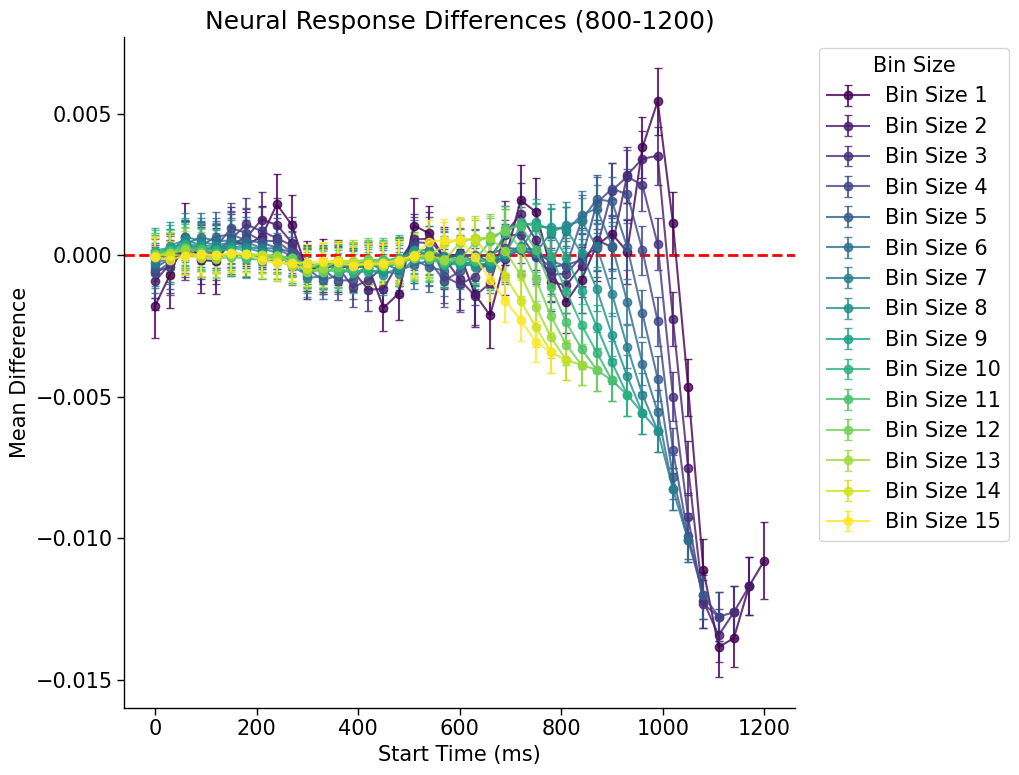

In [64]:
# Calculate statistics from the differences
df_stats = calculate_difference_stats(neural_response_differences, bin_duration=30)  # Adjust bin_duration based on your data

# Create a plot for the 400-800 differences
fig = plot_neural_differences(df_stats, diff_type="800-1200")
plt.show()

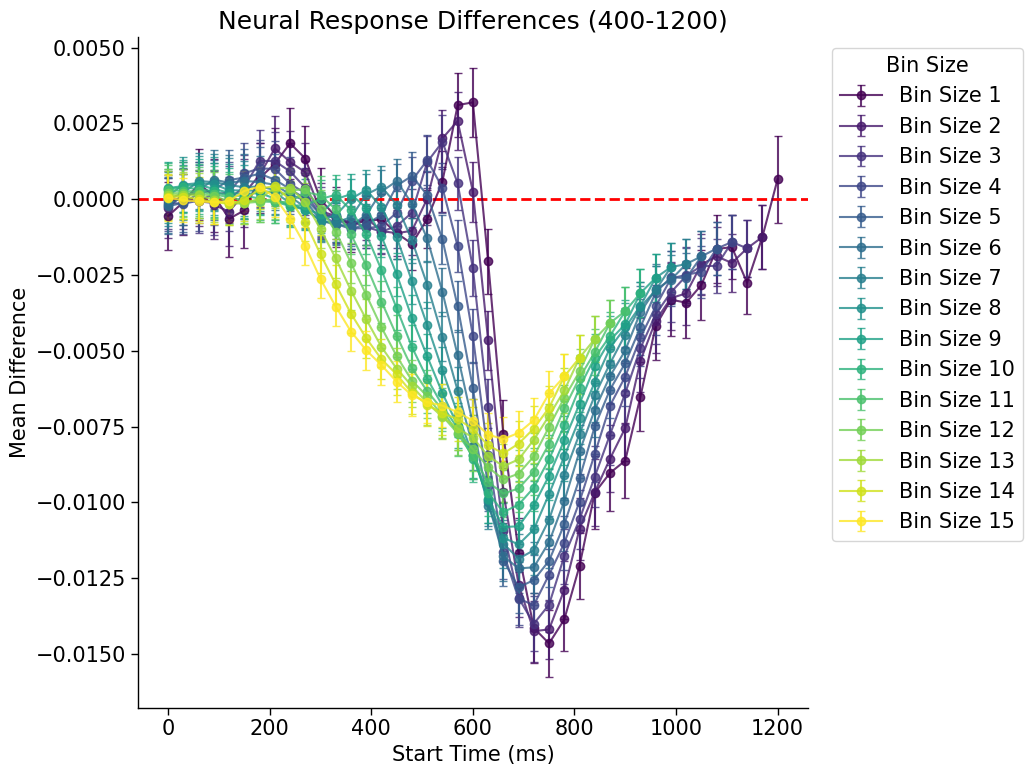

In [63]:
# Calculate statistics from the differences
df_stats = calculate_difference_stats(neural_response_differences, bin_duration=30)  # Adjust bin_duration based on your data

# Create a plot for the 400-800 differences
fig = plot_neural_differences(df_stats, diff_type="400-1200")
plt.show()

In [50]:
df_stats[df_stats["start_time"] == 800]

,start_time,bin_size,diff_type,mean,se


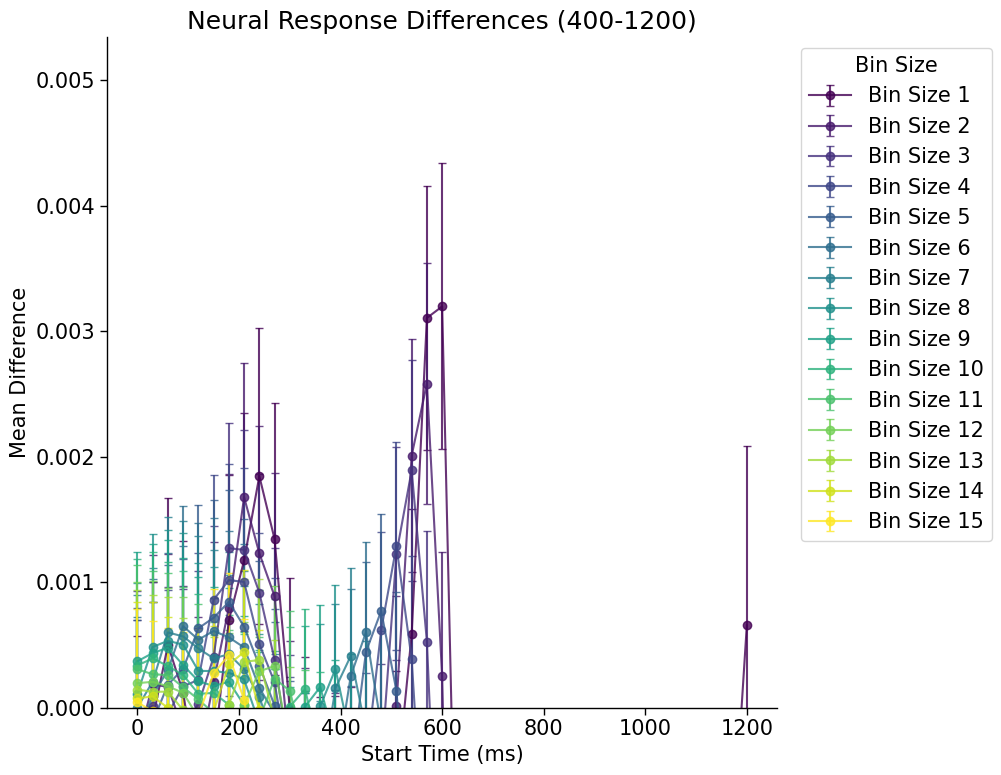

In [41]:
# Calculate statistics from the differences
df_stats = calculate_difference_stats(neural_response_differences, bin_duration=30)  # Adjust bin_duration based on your data

# Create a plot for the 400-800 differences
fig = plot_neural_differences(df_stats, diff_type="400-1200")
plt.show()

In [46]:
from matplotlib.colors import to_rgba

def create_aggregated_scatter_plots_colored_by_bin(neural_response_differences, bin_duration, output_dir='aggregated_plots'):
    """
    Create individual aggregated scatter plots for each pair of delay conditions,
    with points colored by bin size.
    
    Parameters:
    - neural_response_differences: The neural response differences dictionary
    - bin_duration: The duration of each bin in ms
    - output_dir: Directory to save the plots
    
    Returns:
    - Dictionary of the three figures
    """
    import os
    
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Create a DataFrame to store all data with metadata
    data_list = []
    
    # Collect all data across init times and bin sizes
    for init in tqdm(neural_response_differences.keys(), desc="Collecting data"):
        for bin_size in neural_response_differences[init].keys():
            # Get the data
            data_400_800 = neural_response_differences[init][bin_size]["400-800"]
            data_400_1200 = neural_response_differences[init][bin_size]["400-1200"]
            data_800_1200 = neural_response_differences[init][bin_size]["800-1200"]
            
            # Average across neurons (axis=1)
            for img_idx in range(data_400_800.shape[0]):
                data_list.append({
                    'init': init,
                    'bin_size': bin_size,
                    'start_time_ms': init * bin_duration,
                    'img_idx': img_idx,
                    'diff_400_800': np.mean(data_400_800[img_idx]),
                    'diff_400_1200': np.mean(data_400_1200[img_idx]),
                    'diff_800_1200': np.mean(data_800_1200[img_idx])
                })
    
    # Convert to DataFrame
    df = pd.DataFrame(data_list)
    
    # Get unique bin sizes for color mapping
    unique_bin_sizes = sorted(df['bin_size'].unique())
    
    # Create a color map
    cmap = plt.cm.viridis
    colors = [cmap(i / len(unique_bin_sizes)) for i in range(len(unique_bin_sizes))]
    bin_to_color = dict(zip(unique_bin_sizes, colors))
    
    figures = {}
    
    # Plot 1: 400-800 vs 400-1200
    fig1 = plt.figure(figsize=(10, 8))
    ax1 = fig1.add_subplot(111)
    
    # Plot each bin size with a different color
    for bin_size in unique_bin_sizes:
        bin_df = df[df['bin_size'] == bin_size]
        ax1.scatter(
            bin_df['diff_400_800'], 
            bin_df['diff_400_1200'],
            alpha=0.6, 
            s=15,
            color=bin_to_color[bin_size],
            label=f'Bin Size {bin_size}'
        )
    
    ax1.set_xlabel('400ms - 800ms')
    ax1.set_ylabel('400ms - 1200ms')
    ax1.set_title('Comparison: 400-800 vs 400-1200')
    # ax1.grid(True, alpha=0.3)
    
    # Calculate correlation coefficient
    corr_400_800_400_1200 = np.corrcoef(df['diff_400_800'], df['diff_400_1200'])[0, 1]
    ax1.text(0.05, 0.95, f'Correlation: {corr_400_800_400_1200:.3f}', 
             transform=ax1.transAxes, fontsize=10,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    # Add diagonal line
    min_val = min(ax1.get_xlim()[0], ax1.get_ylim()[0])
    max_val = max(ax1.get_xlim()[1], ax1.get_ylim()[1])
    ax1.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='y=x')
    
    # Add legend outside the plot
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Bin Size')
    
    # Ensure equal aspect ratio
    ax1.set_aspect('equal', adjustable='box')
    
    # Save the figure
    plt.tight_layout()
    fig1.savefig(f"{output_dir}/scatter_400_800_vs_400_1200_colored.png", dpi=300, bbox_inches='tight')
    figures['400_800_vs_400_1200'] = fig1
    
    # Plot 2: 400-800 vs 800-1200
    fig2 = plt.figure(figsize=(10, 8))
    ax2 = fig2.add_subplot(111)
    
    # Plot each bin size with a different color
    for bin_size in unique_bin_sizes:
        bin_df = df[df['bin_size'] == bin_size]
        ax2.scatter(
            bin_df['diff_400_800'], 
            bin_df['diff_800_1200'],
            alpha=0.6, 
            s=15,
            color=bin_to_color[bin_size],
            label=f'Bin Size {bin_size}'
        )
    
    ax2.set_xlabel('400ms - 800ms')
    ax2.set_ylabel('800ms - 1200ms')
    ax2.set_title('Comparison: 400-800 vs 800-1200')
    # ax2.grid(True, alpha=0.3)
    
    # Calculate correlation coefficient
    corr_400_800_800_1200 = np.corrcoef(df['diff_400_800'], df['diff_800_1200'])[0, 1]
    ax2.text(0.05, 0.95, f'Correlation: {corr_400_800_800_1200:.3f}', 
             transform=ax2.transAxes, fontsize=10,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    # Add diagonal line
    min_val = min(ax2.get_xlim()[0], ax2.get_ylim()[0])
    max_val = max(ax2.get_xlim()[1], ax2.get_ylim()[1])
    ax2.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='y=x')
    
    # Add legend outside the plot
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Bin Size')
    
    # Ensure equal aspect ratio
    ax2.set_aspect('equal', adjustable='box')
    
    # Save the figure
    plt.tight_layout()
    fig2.savefig(f"{output_dir}/scatter_400_800_vs_800_1200_colored.png", dpi=300, bbox_inches='tight')
    figures['400_800_vs_800_1200'] = fig2
    
    # Plot 3: 400-1200 vs 800-1200
    fig3 = plt.figure(figsize=(10, 8))
    ax3 = fig3.add_subplot(111)
    
    # Plot each bin size with a different color
    for bin_size in unique_bin_sizes:
        bin_df = df[df['bin_size'] == bin_size]
        ax3.scatter(
            bin_df['diff_400_1200'], 
            bin_df['diff_800_1200'],
            alpha=0.6, 
            s=15,
            color=bin_to_color[bin_size],
            label=f'Bin Size {bin_size}'
        )
    
    ax3.set_xlabel('400ms - 1200ms')
    ax3.set_ylabel('800ms - 1200ms')
    ax3.set_title('Comparison: 400-1200 vs 800-1200')
    # ax3.grid(True, alpha=0.3)
    
    # Calculate correlation coefficient
    corr_400_1200_800_1200 = np.corrcoef(df['diff_400_1200'], df['diff_800_1200'])[0, 1]
    ax3.text(0.05, 0.95, f'Correlation: {corr_400_1200_800_1200:.3f}', 
             transform=ax3.transAxes, fontsize=10,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    # Add diagonal line
    min_val = min(ax3.get_xlim()[0], ax3.get_ylim()[0])
    max_val = max(ax3.get_xlim()[1], ax3.get_ylim()[1])
    ax3.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='y=x')
    
    # Add legend outside the plot
    ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Bin Size')
    
    # Ensure equal aspect ratio
    ax3.set_aspect('equal', adjustable='box')
    make_a_plot_beautiful(ax1)
    make_a_plot_beautiful(ax2)
    make_a_plot_beautiful(ax3)
    
    
    # Save the figure
    plt.tight_layout()
    fig3.savefig(f"{output_dir}/scatter_400_1200_vs_800_1200_colored.png", dpi=300, bbox_inches='tight')
    figures['400_1200_vs_800_1200'] = fig3
    
    print(f"All scatter plots saved to {output_dir}/")
    
    # Calculate and print the correlation coefficients
    print(f"Correlation between 400-800 and 400-1200: {corr_400_800_400_1200:.3f}")
    print(f"Correlation between 400-800 and 800-1200: {corr_400_800_800_1200:.3f}")
    print(f"Correlation between 400-1200 and 800-1200: {corr_400_1200_800_1200:.3f}")
    
    return figures, df

All scatter plots saved to aggregated_plots/
Correlation between 400-800 and 400-1200: 0.570
Correlation between 400-800 and 800-1200: -0.517
Correlation between 400-1200 and 800-1200: 0.409


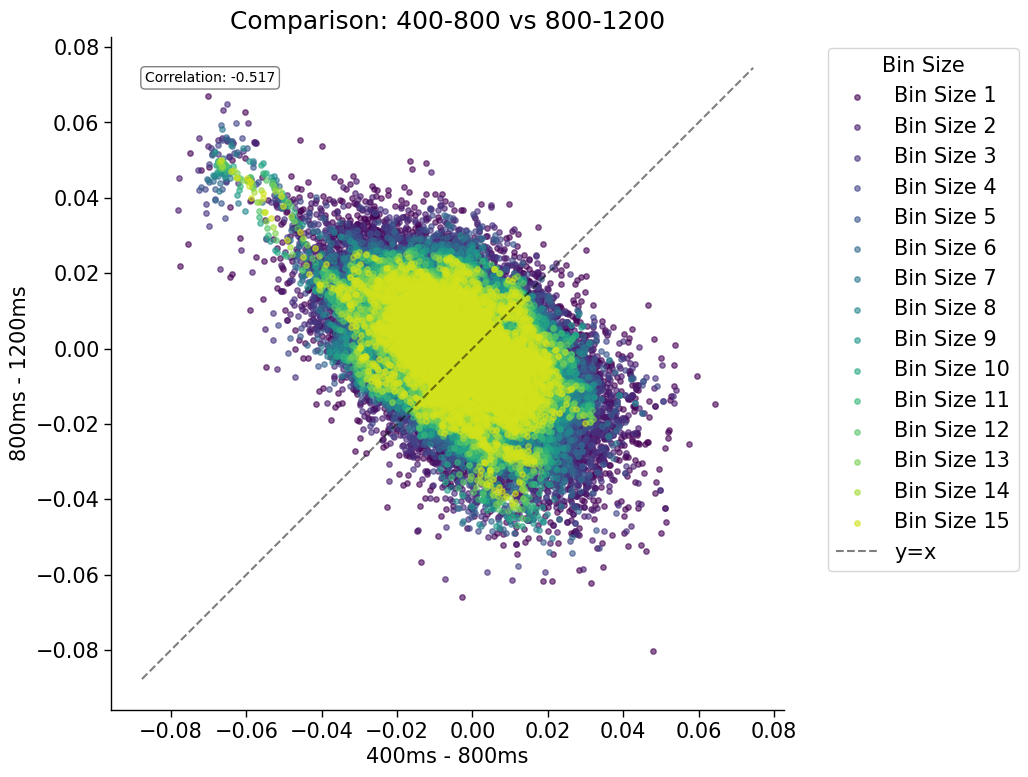

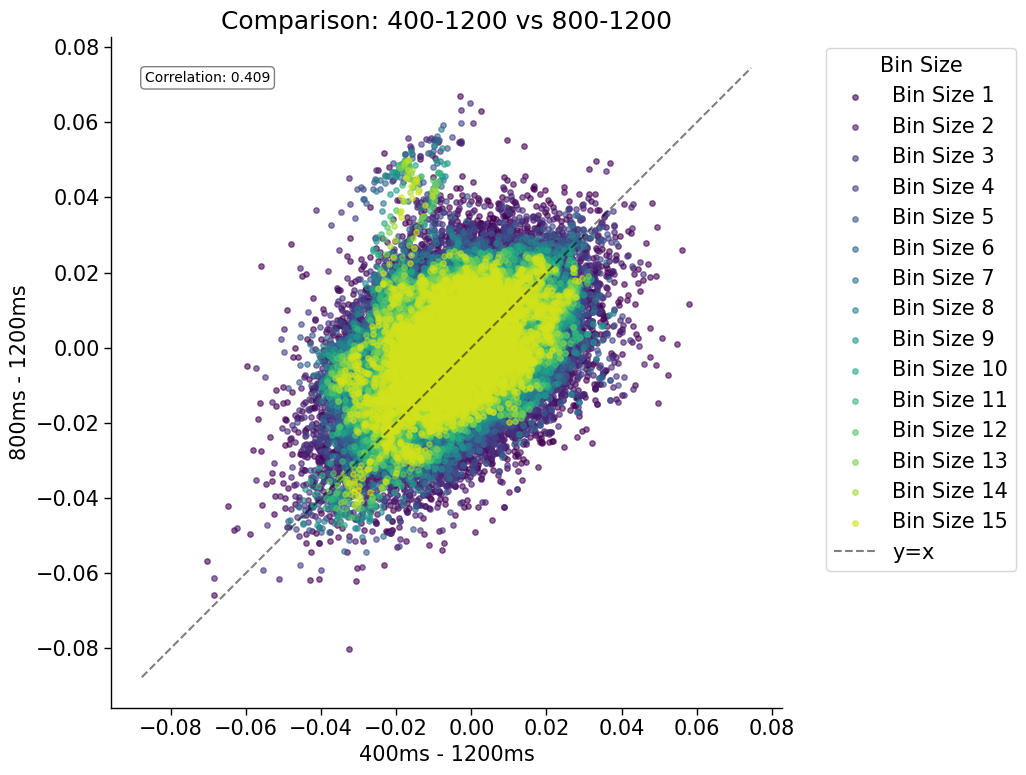

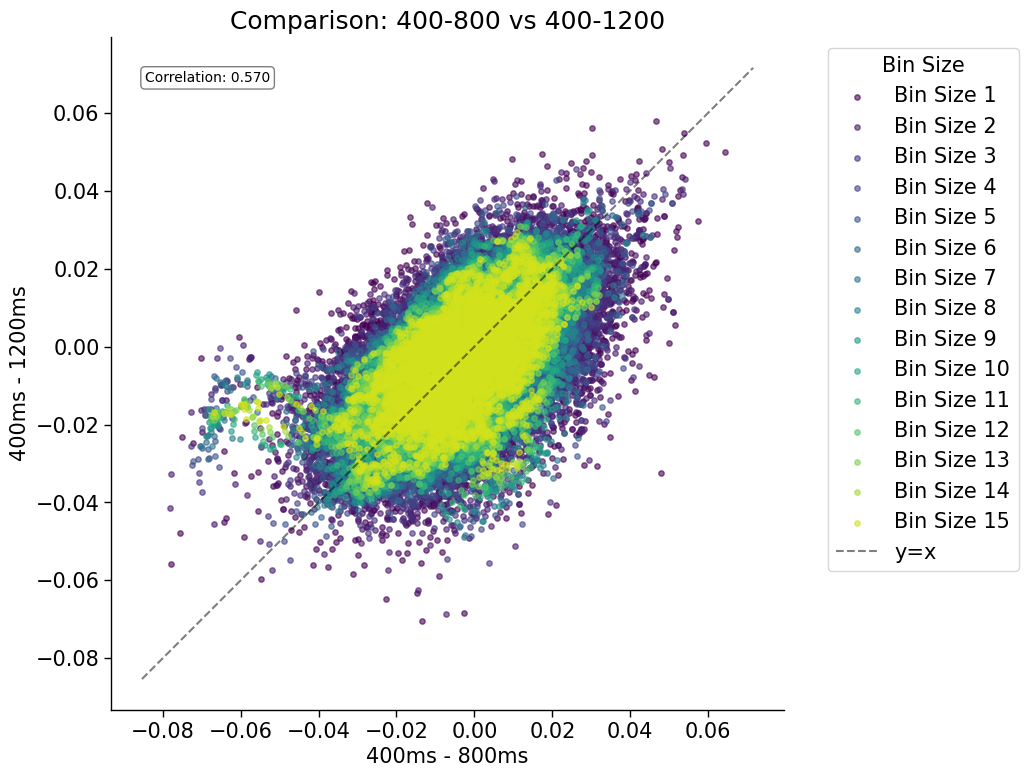

In [48]:
# Create the scatter plots with points colored by bin size
figures, data_df = create_aggregated_scatter_plots_colored_by_bin(
    neural_response_differences, 
    bin_duration=30
)

# If you want to display a specific plot
plt.figure(figures['400_800_vs_400_1200'].number)
plt.show()